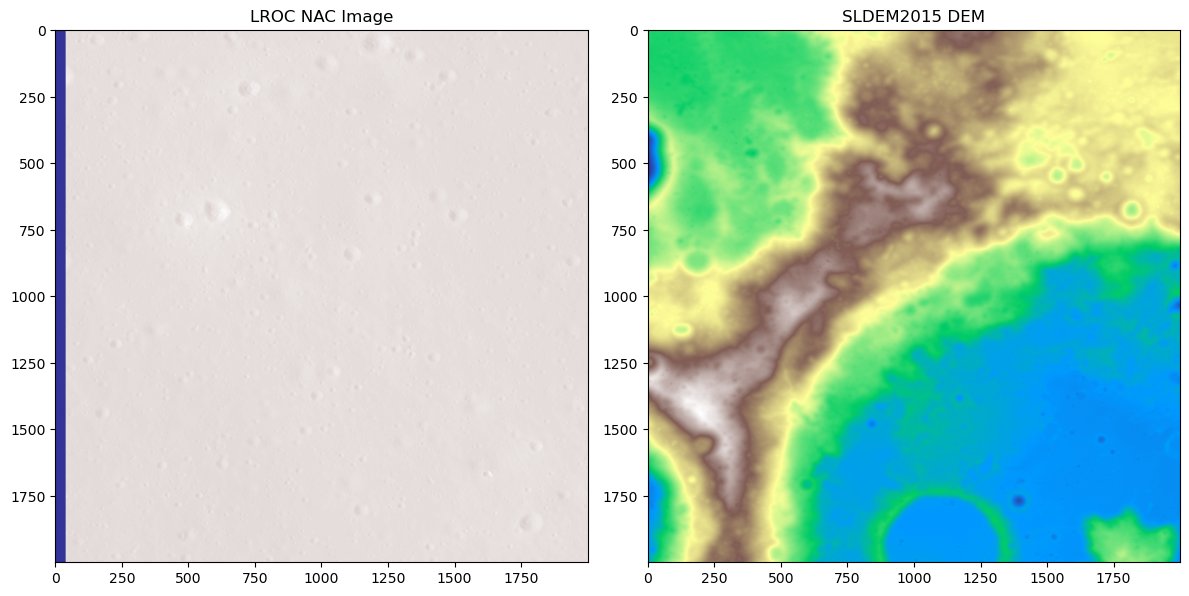

In [2]:
from osgeo import gdal
import matplotlib.pyplot as plt

# Correct path format
nac_path = r"D:\gdem\data\M177040959LC.tif"
nac_ds = gdal.Open(nac_path)
if not nac_ds:
    raise RuntimeError("Failed to open NAC image. Check the file path or format.")

nac_array = nac_ds.ReadAsArray(0, 0, 2000, 2000)



sldem_path = r"D:\gdem\data\SLDEM2015_512_00N_30N_090_135.tif"
sldem_ds = gdal.Open(sldem_path)
if not sldem_ds:
    raise RuntimeError("Failed to open SLDEM2015 DEM. Check the file path.")

# Example: Read a 2000x2000 region from top-left corner



sldem_array = sldem_ds.ReadAsArray(0, 0, 2000, 2000)


# Show both images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(nac_array, cmap='terrain')
plt.title("LROC NAC Image")

plt.subplot(1, 2, 2)
plt.imshow(sldem_array, cmap='terrain')
plt.title("SLDEM2015 DEM")

plt.tight_layout()
plt.show()


In [10]:
import os
print("Exists:", os.path.exists("D:/gdem/data/M1483201510RC.tif"))



Exists: True


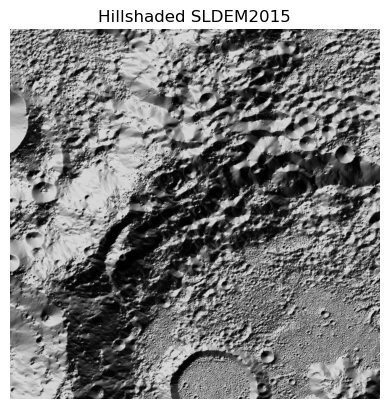

In [3]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

def hillshade(array, azimuth=315, angle_altitude=45):
    x, y = np.gradient(array)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)
    azimuth_rad = azimuth * np.pi / 180.
    altitude_rad = angle_altitude * np.pi / 180.

    shaded = np.sin(altitude_rad) * np.sin(slope) + \
             np.cos(altitude_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)
    shaded = (shaded - shaded.min()) / (shaded.max() - shaded.min()) * 255
    return shaded.astype(np.uint8)

# Hillshade from the 2000x2000 SLDEM subset
sldem_hillshade = hillshade(sldem_array)

# Visualize
plt.imshow(sldem_hillshade, cmap='gray')
plt.title("Hillshaded SLDEM2015")
plt.axis('off')
plt.show()
